In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
%%shell
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/capello.txt > capello.txt
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/filo2.txt > filo2.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45008  100 45008    0     0   269k      0 --:--:-- --:--:-- --:--:--  269k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44753  100 44753    0     0   305k      0 --:--:-- --:--:-- --:--:--  305k


In [4]:
#definiamo la funzione parabola
def parabola_fit(x, a,b,c):
  return a*(x**2) + b*x +c
#definiamo l'errore sulle y
sigma_1f = 10
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#Definiamo la funzione vertice
def vertice_parabola(b, a):
  return (-b) / (2*a)
#Definiamo la funzione sigma vertice
def sigma_vertice_parabola(vertice, b, sigma_b, a, sigma_a): #per passare la sigma del parametro bisogna passare la radice della diagonale della matrice di covarianza
  parametro_vertice = ( (-b) / (2*a) )**2
  parametro_err1 = ( sigma_b / b )**2
  parametro_err2 = ( 2*sigma_a / a )**2
  #parametro_cov = ( 2*cov ) / ( b*a )
  parametro_errs = parametro_err1 + parametro_err2
  return math.sqrt( parametro_vertice*parametro_errs )
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#costante di conversione pm -> rad
pm_rad = 1.9 * pow(10,-5)
sigma_pm_rad = 1.4 * pow(10,-7)
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#definiamo la funzione di una retta
def retta_interpolante(x, a, b):
  return a + (np.asarray(b)*x)
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
lunghezza_donda = 670 #nm
sigma_lunghezza_donda = 5 #nm

#Capello


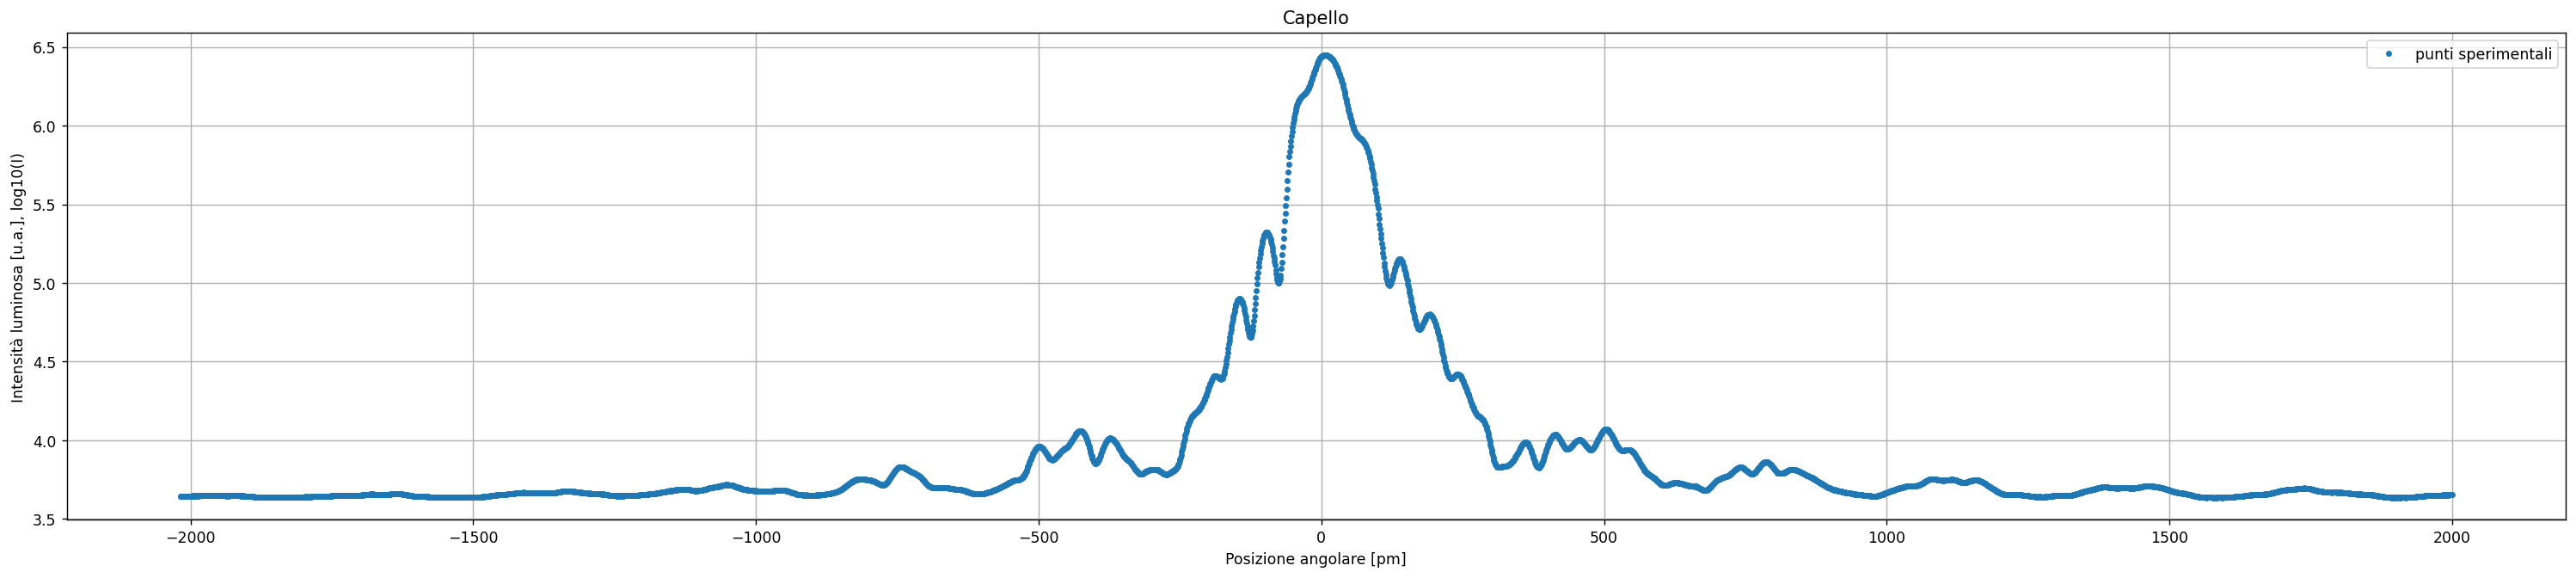

In [23]:
#carichiamo i dati
pm_capello, int_capello = np.loadtxt("capello.txt", delimiter=",",unpack="True")

y = []
for i in int_capello:
  dummy = 0
  dummy = math.log10(i)
  y.append(dummy)

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_capello, y, linestyle="", marker=".", label="punti sperimentali")
plt.title("Capello")
plt.xlabel("Posizione angolare [pm]")
plt.ylabel("Intensità luminosa [u.a.], log10(I)")
plt.legend()
plt.grid()

Parametri 1 a,b,c 
 [6.27076566e-04 4.99951818e-01 1.03508695e+02]
Matrice covarianza 1 
 [[2.64197255e-10 2.11357802e-07 4.22530663e-05]
 [2.11357802e-07 1.69100983e-04 3.38083497e-02]
 [4.22530663e-05 3.38083497e-02 6.75989258e+00]]
1.625414577581498e-05
0.01300388338500059
2.599979341696858


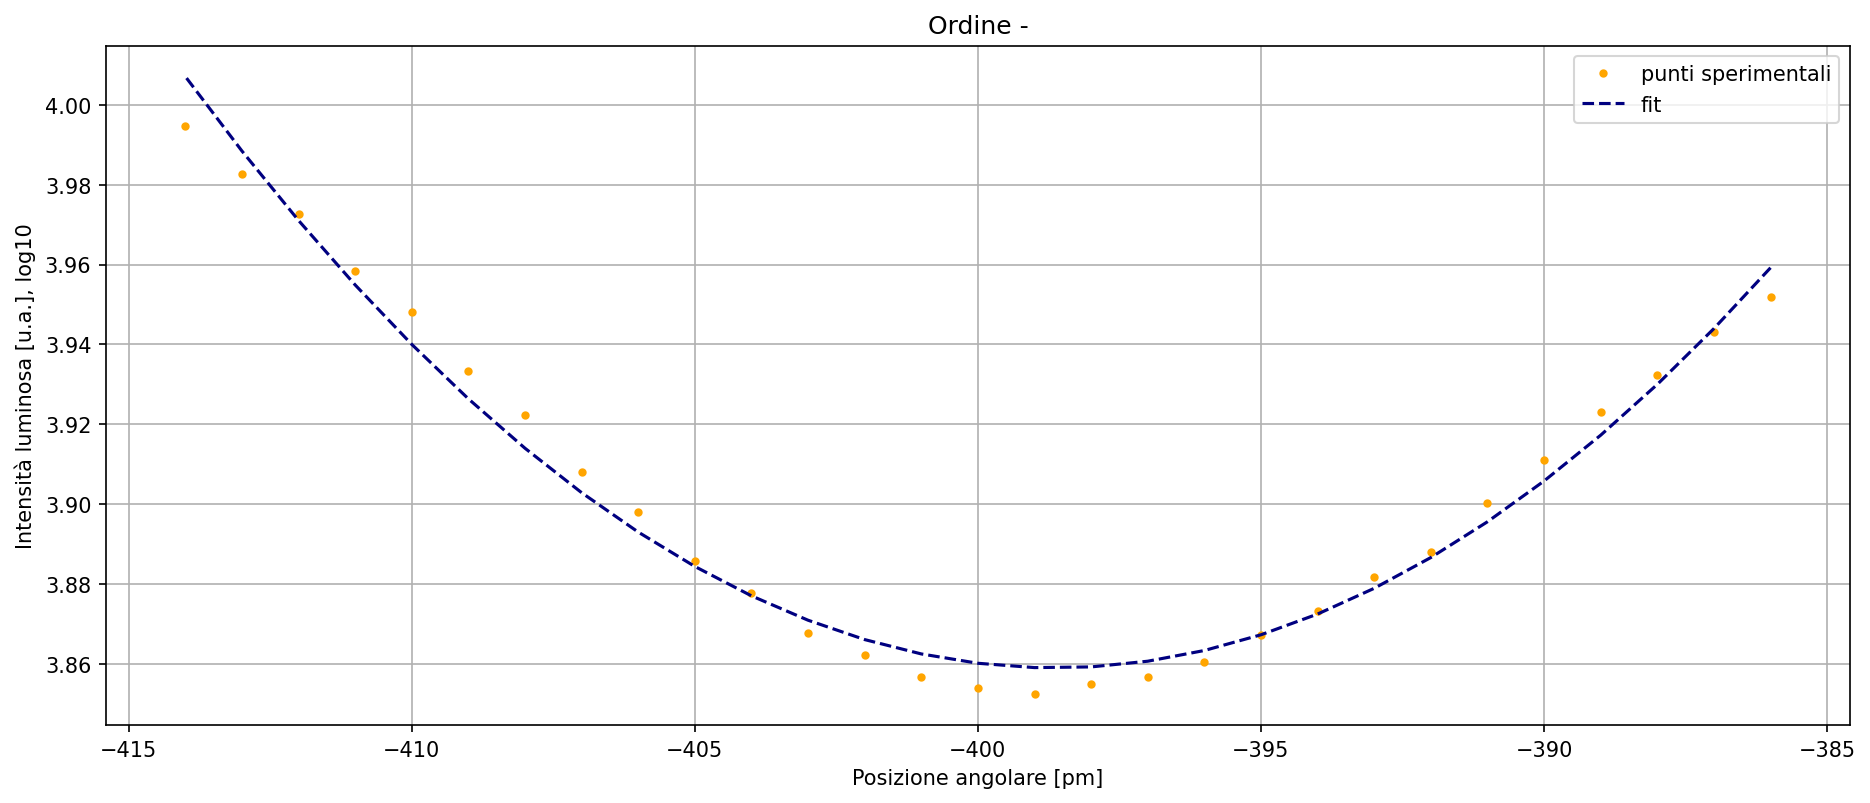

In [29]:
plt.figure(dpi=150, figsize=(15,6))
sigma_1f = 10
#1   
pm_min_uno = pm_capello[2386 : 2415]
int_min_uno = y[2386 : 2415]
f1 = plt.subplot(1,1,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange", label="punti sperimentali")

par_1_capello, cov_1_capello = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_capello)
print("Matrice covarianza 1 \n", cov_1_capello)
a1_capello, b1_capello, c1_capello = par_1_capello
var_a1_capello = cov_1_capello[0,0]
var_b1_capello = cov_1_capello[1,1]
print(math.sqrt(cov_1_capello[0,0]))
print(math.sqrt(cov_1_capello[1,1]))
print(math.sqrt(cov_1_capello[2,2]))

f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_capello, b1_capello, c1_capello), linestyle="--", marker="", color="navy", label="fit")
f1.grid()
f1.set_title("Ordine -")
f1.set_xlabel("Posizione angolare [pm]")
f1.set_ylabel("Intensità luminosa [u.a.], log10")
f1.legend()


Parametri 2 a,b,c 
 [ 5.75533893e-04 -4.42436941e-01  8.88630732e+01]
Matrice covarianza 2 
 [[ 4.73590699e-10 -3.66559204e-07  7.09004755e-05]
 [-3.66559204e-07  2.83739717e-04 -5.48858272e-02]
 [ 7.09004755e-05 -5.48858272e-02  1.06178219e+01]]
2.1762139124144215e-05
0.016844575313350898
3.258499946095381


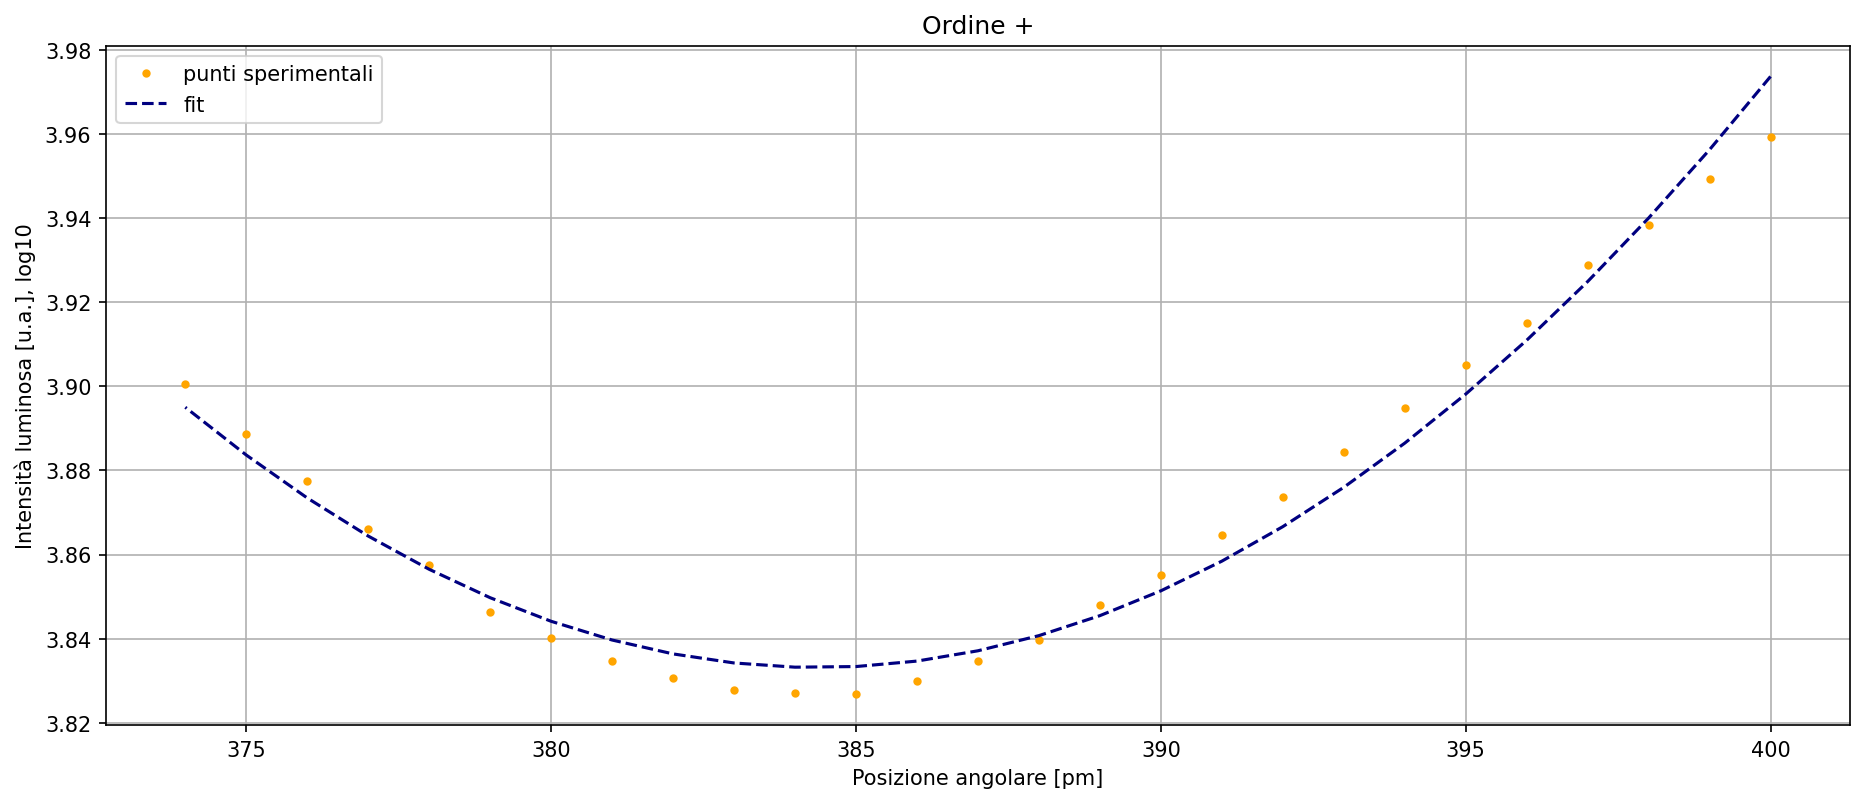

In [32]:
#2 
plt.figure(dpi=150, figsize=(15,6))  
pm_min_due = pm_capello[1600 : 1627]
int_min_due = y[1600 : 1627]
f2 = plt.subplot(1,1,1)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange", label="punti sperimentali")

par_2_capello, cov_2_capello = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_capello)
print("Matrice covarianza 2 \n", cov_2_capello)
a2_capello, b2_capello, c2_capello = par_2_capello
var_a2_capello = cov_2_capello[0,0]
var_b2_capello = cov_2_capello[1,1]
print(math.sqrt(cov_2_capello[0,0]))
print(math.sqrt(cov_2_capello[1,1]))
print(math.sqrt(cov_2_capello[2,2]))

f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_capello, b2_capello, c2_capello), linestyle="--", marker="", color="navy", label="fit")
f2.grid()
f2.set_title("Ordine +")
f2.set_xlabel("Posizione angolare [pm]")
f2.set_ylabel("Intensità luminosa [u.a.], log10")
f2.legend()

In [33]:
#1
vertice_1_capello = vertice_parabola(b1_capello, a1_capello)
sigmav_1_capello = sigma_vertice_parabola(vertice_1_capello, b1_capello, math.sqrt(var_b1_capello), a1_capello, math.sqrt(var_a1_capello))
#2
vertice_2_capello = vertice_parabola(b2_capello, a2_capello)
sigmav_2_capello = sigma_vertice_parabola(vertice_2_capello, b2_capello, math.sqrt(var_b2_capello), a2_capello, math.sqrt(var_a2_capello))

#costruiamo il vettore dei vertici in passi motore
vertici_pm_capello = [vertice_1_capello,vertice_2_capello]
sigma_vertici_pm_capello = [sigmav_1_capello,sigmav_2_capello]

#convertiamo i pm in radianti
vertici_rad_capello = []
for i in vertici_pm_capello:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_capello.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_capello = []
for i in vertici_rad_capello:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_capello.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_capello = []
for i in sigma_vertici_pm_capello:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_capello.append(dummy)
sigma_vertici_sen_capello = []
for i in sigma_vertici_rad_capello:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_capello.append(dummy)
print("Vertici in passi motore")
for i in vertici_pm_capello:
  print(i)
print("\n Sigma vertici in passi motore")
for i in sigma_vertici_pm_capello:
  print(i)
print("\n Vertici radiati")
for i in vertici_rad_capello:
  print(i)
print("\n Sigma vertici radianti")
for i in sigma_vertici_rad_capello:
  print(i)
print("\n Seno vertici")
for i in vertici_sen_capello:
  print(i)
print("\n Sigma seno vertici")
for i in sigma_vertici_sen_capello:
  print(i)

Vertici in passi motore
-398.63698057828503
384.3708829512627

 Sigma vertici in passi motore
23.121034650185408
32.543558490850664

 Vertici radiati
-0.007574102630987416
0.007303046776073991

 Sigma vertici radianti
0.0004392996583535228
0.0006183276113261627

 Seno vertici
-0.0075740302138988195
0.007302981858865206

 Sigma seno vertici
0.00043929961596457913
0.0006183274931238669


In [8]:
#Calcolo dello spessore
spov = 670 / 0.007302981858865206
sneg = 670 / -0.0075740302138988195

epov = math.sqrt( spov*spov*( (sigma_lunghezza_donda/lunghezza_donda)**2 + (math.cos(0.007303046776073991)*0.0006183276113261627/0.007302981858865206)**2  )  )

eneg = math.sqrt( spov*spov*( (sigma_lunghezza_donda/lunghezza_donda)**2 + (math.cos(-0.007574102630987416)*0.0004392996583535228/-0.0075740302138988195)**2  )  )



print("Spessore pov\n", spov)
print("Errore \n", epov)
print("Spessore neg\n", sneg)
print("Errore \n", eneg)

Spessore pov
 91743.34716259447
Errore 
 7797.6180790616745
Spessore neg
 -88460.16995951615
Errore 
 5364.8989554774425


#Filo


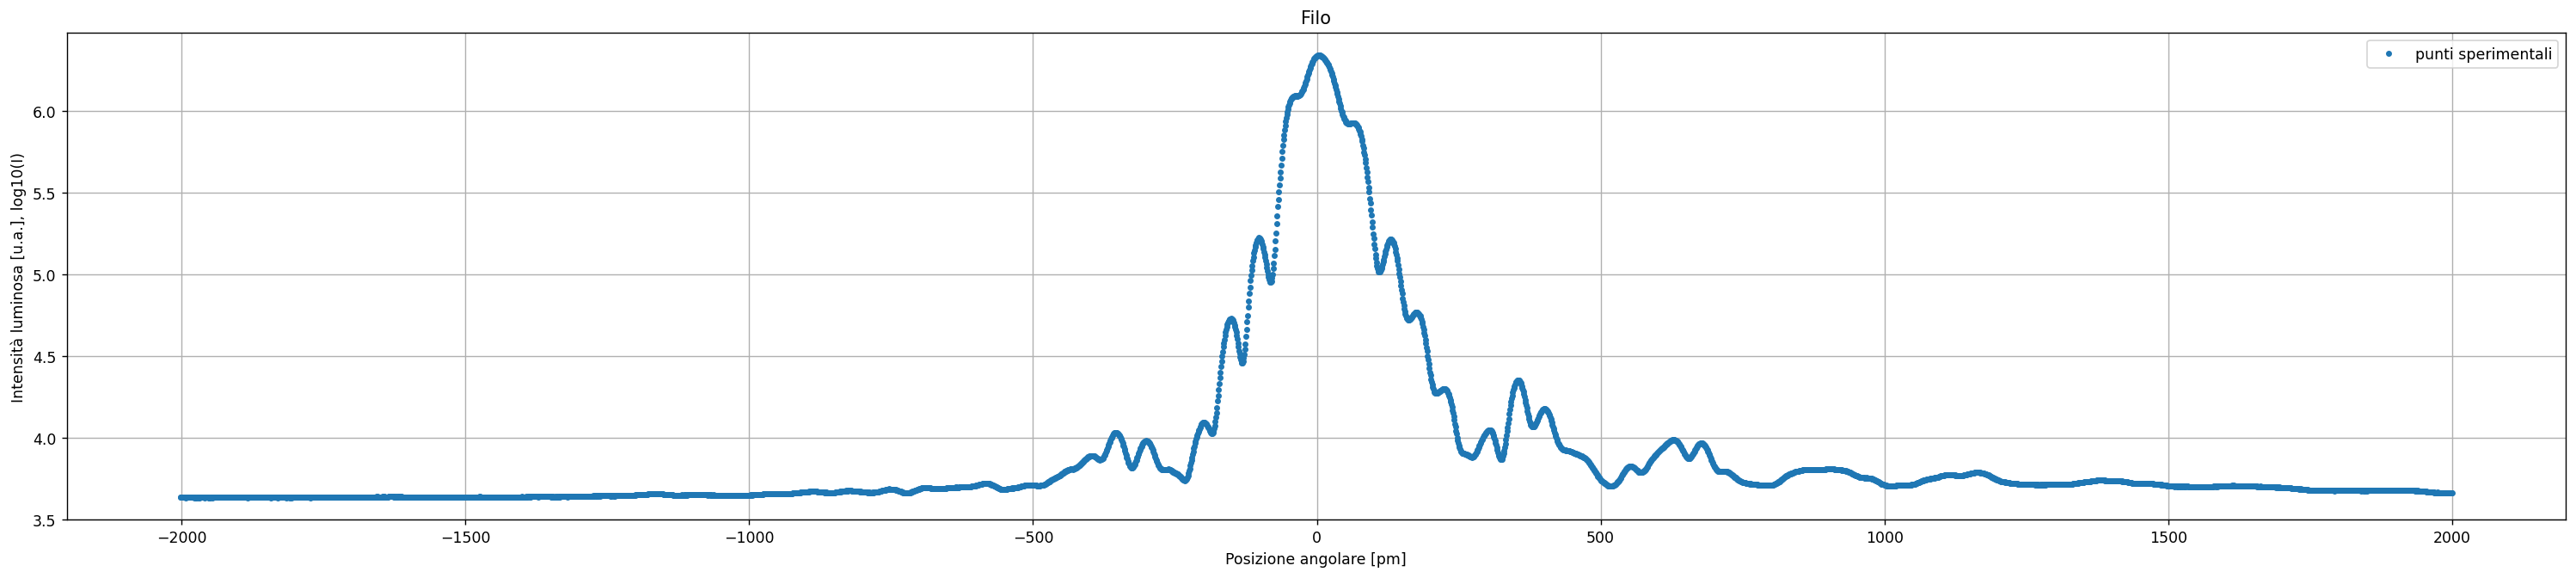

In [38]:
#carichiamo i dati
pm_filo, int_filo = np.loadtxt("filo2.txt", delimiter=",",unpack="True")

y = []
for i in int_filo:
  dummy = 0
  dummy = math.log10(i)
  y.append(dummy)

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_filo, y, linestyle="", marker=".", label="punti sperimentali")
plt.title("Filo")
plt.xlabel("Posizione angolare [pm]")
plt.ylabel("Intensità luminosa [u.a.], log10(I)")
plt.legend()
plt.grid()

Parametri 1 a,b,c 
 [ 8.53193568e-04 -6.51025557e-01  1.28257246e+02]
Matrice covarianza 1 
 [[ 5.75203897e-10 -4.37730145e-07  8.32590304e-05]
 [-4.37730145e-07  3.33127810e-04 -6.33658972e-02]
 [ 8.32590304e-05 -6.33658972e-02  1.20536927e+01]]
2.398340879028214e-05
0.01825178922528343
3.4718428453602463


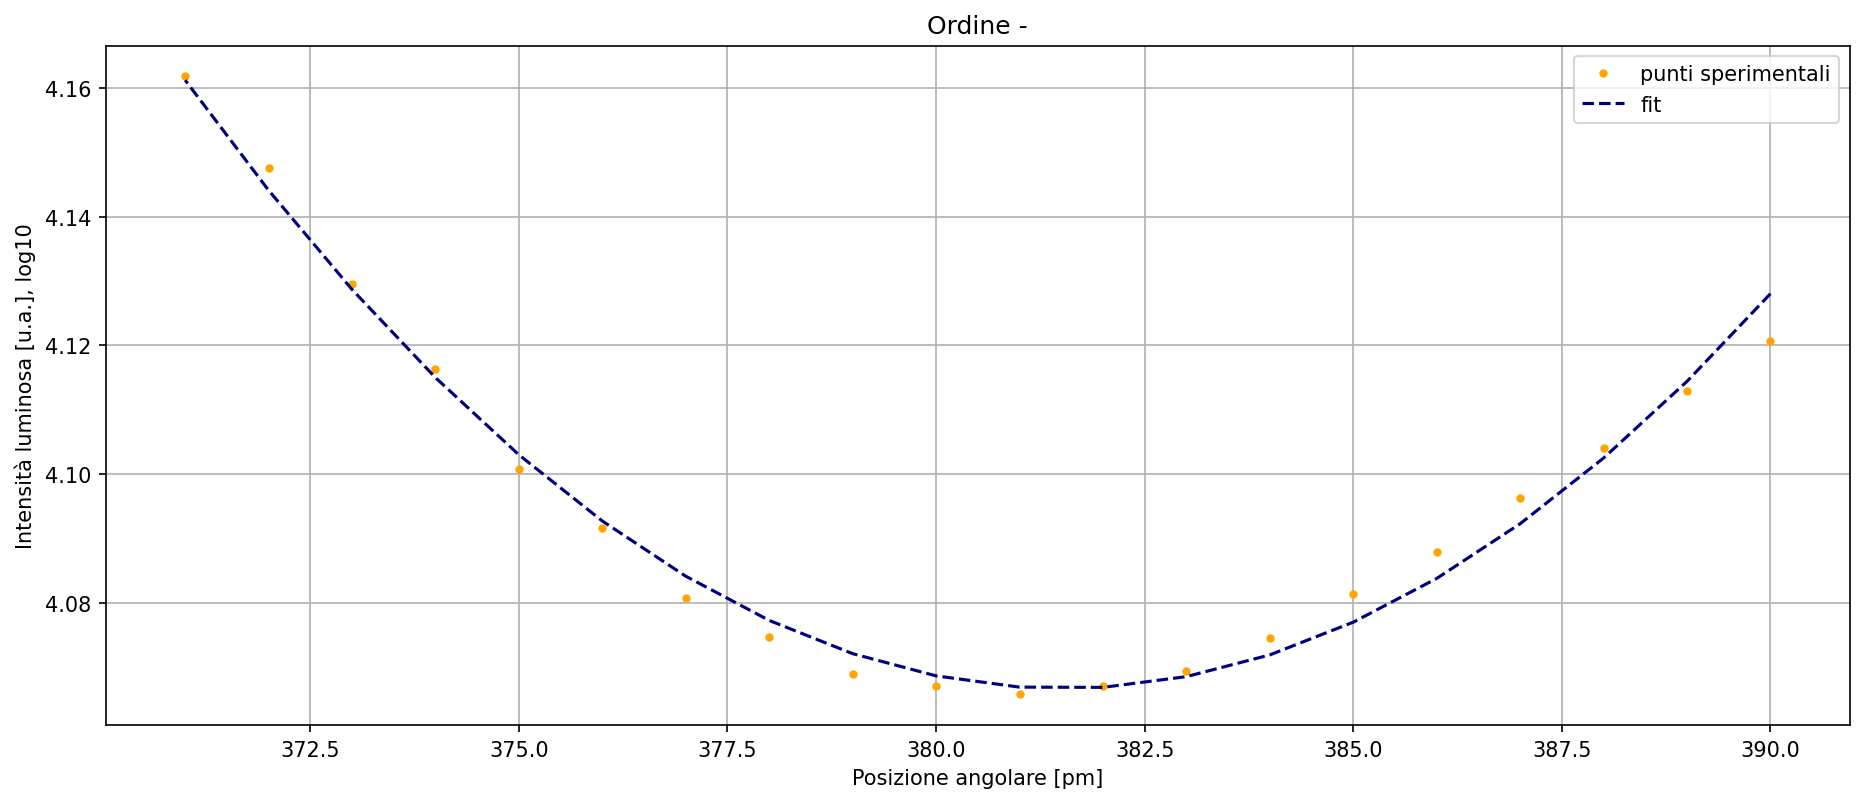

In [44]:
plt.figure(dpi=150, figsize=(15,6))
sigma_1f = 10
#1   
pm_min_uno = pm_filo[1610 : 1630]
int_min_uno = y[1610 : 1630]
f1 = plt.subplot(1,1,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange", label="punti sperimentali")

par_1_filo, cov_1_filo = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_filo)
print("Matrice covarianza 1 \n", cov_1_filo)
a1_filo, b1_filo, c1_filo = par_1_filo
var_a1_filo = cov_1_filo[0,0]
var_b1_filo = cov_1_filo[1,1]
print(math.sqrt(cov_1_filo[0,0]))
print(math.sqrt(cov_1_filo[1,1]))
print(math.sqrt(cov_1_filo[2,2]))

f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_filo, b1_filo, c1_filo), linestyle="--", marker="", color="navy", label="fit")
f1.grid()
f1.set_title("Ordine -")
f1.set_xlabel("Posizione angolare [pm]")
f1.set_ylabel("Intensità luminosa [u.a.], log10")
f1.legend()


Parametri 2 a,b,c 
 [4.09001238e-04 3.12811516e-01 6.36758866e+01]
Matrice covarianza 2 
 [[1.17889011e-10 8.94777625e-08 1.69744862e-05]
 [8.94777625e-08 6.79167365e-05 1.28848166e-02]
 [1.69744862e-05 1.28848166e-02 2.44455386e+00]]
1.0857670603681434e-05
0.00824116111243137
1.5635069123108651


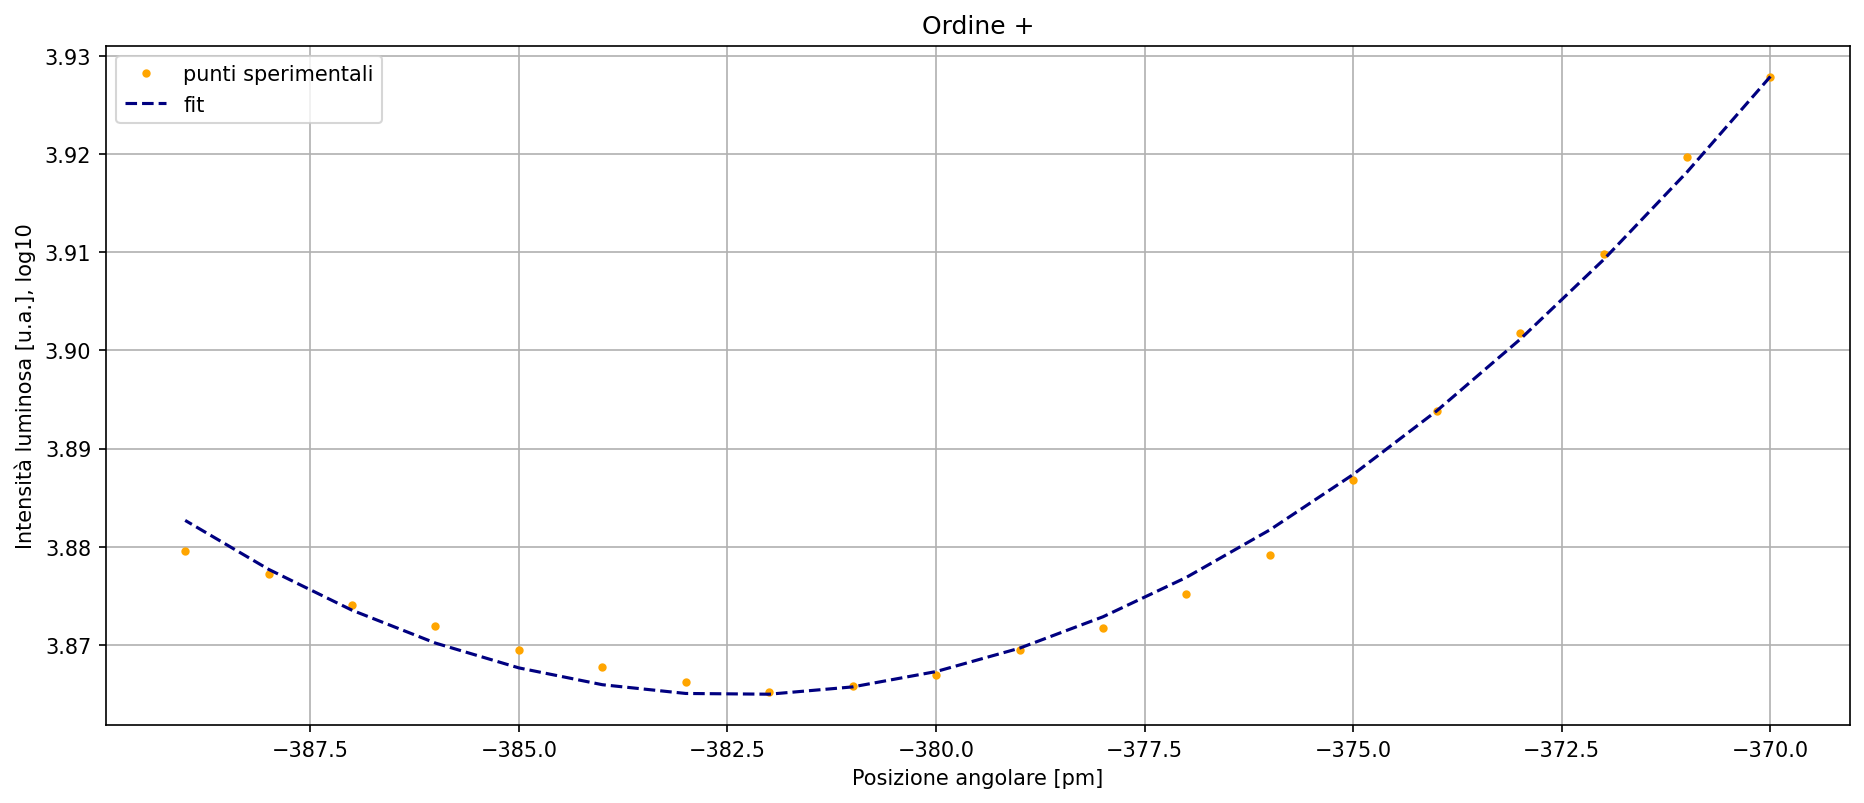

In [46]:
#2 
plt.figure(dpi=150, figsize=(15,6))  
pm_min_due = pm_filo[2370 : 2390]
int_min_due = y[2370 : 2390]
f2 = plt.subplot(1,1,1)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange", label="punti sperimentali")

par_2_filo, cov_2_filo = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_filo)
print("Matrice covarianza 2 \n", cov_2_filo)
a2_filo, b2_filo, c2_filo = par_2_filo
var_a2_filo = cov_2_filo[0,0]
var_b2_filo = cov_2_filo[1,1]
print(math.sqrt(cov_2_filo[0,0]))
print(math.sqrt(cov_2_filo[1,1]))
print(math.sqrt(cov_2_filo[2,2]))

f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_filo, b2_filo, c2_filo), linestyle="--", marker="", color="navy", label="fit")
f2.grid()
f2.set_title("Ordine +")
f2.set_xlabel("Posizione angolare [pm]")
f2.set_ylabel("Intensità luminosa [u.a.], log10")
f2.legend()

In [47]:
#1
vertice_1_filo = vertice_parabola(b1_filo, a1_filo)
sigmav_1_filo = sigma_vertice_parabola(vertice_1_filo, b1_filo, math.sqrt(var_b1_filo), a1_filo, math.sqrt(var_a1_filo))
#2
vertice_2_filo = vertice_parabola(b2_filo, a2_filo)
sigmav_2_filo = sigma_vertice_parabola(vertice_2_filo, b2_filo, math.sqrt(var_b2_filo), a2_filo, math.sqrt(var_a2_filo))

#costruiamo il vettore dei vertici in passi motore
vertici_pm_filo = [vertice_1_filo,vertice_2_filo]
sigma_vertici_pm_filo = [sigmav_1_filo,sigmav_2_filo]

#convertiamo i pm in radianti
vertici_rad_filo = []
for i in vertici_pm_filo:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_filo.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_filo = []
for i in vertici_rad_filo:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_filo.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_filo = []
for i in sigma_vertici_pm_filo:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_filo.append(dummy)
sigma_vertici_sen_filo = []
for i in sigma_vertici_rad_filo:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_filo.append(dummy)
print("Vertici in passi motore")
for i in vertici_pm_filo:
  print(i)
print("\n Sigma vertici in passi motore")
for i in sigma_vertici_pm_filo:
  print(i)
print("\n Vertici radiati")
for i in vertici_rad_filo:
  print(i)
print("\n Sigma vertici radianti")
for i in sigma_vertici_rad_filo:
  print(i)
print("\n Seno vertici")
for i in vertici_sen_filo:
  print(i)
print("\n Sigma seno vertici")
for i in sigma_vertici_sen_filo:
  print(i)

Vertici in passi motore
381.5227757177028
-382.40900841018384

 Sigma vertici in passi motore
23.96834868425156
22.665635344155074

 Vertici radiati
0.007248932738636354
-0.007265771159793493

 Sigma vertici radianti
0.0004553986250007796
0.0004306470715389464

 Seno vertici
0.007248869253827152
-0.007265707231553312

 Sigma seno vertici
0.00045539857777869645
0.0004306470316057115


In [9]:
#Calcolo dello spessore
spov = 670 / 0.007248869253827152
sneg = 670 / -0.007265707231553312

epov = math.sqrt( spov*spov*( (sigma_lunghezza_donda/lunghezza_donda)**2 + (math.cos(0.007248932738636354)*0.0004553986250007796/0.007248869253827152)**2  )  )

eneg = math.sqrt( spov*spov*( (sigma_lunghezza_donda/lunghezza_donda)**2 + (math.cos(-0.007265771159793493)*0.0004306470715389464/-0.007265707231553312)**2  )  )



print("Spessore pov\n", spov)
print("Errore \n", epov)
print("Spessore neg\n", sneg)
print("Errore \n", eneg)

Spessore pov
 92428.2086680296
Errore 
 5847.327356267101
Spessore neg
 -92214.0100953067
Errore 
 5521.438317269046
